## Preprocessing 이전 단계 작업(라이브러리 import, Data 불러오기 등)

### 필요한 라이브러리 import 하기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Warnig message 무시

In [2]:
import warnings
warnings.filterwarnings(action='ignore')

### Covid-19 Data 불러오기

In [3]:
case = pd.read_csv("Case.csv")
patientinfo = pd.read_csv("PatientInfo.csv")
patientroute = pd.read_csv("PatientRoute.csv")
policy = pd.read_csv("Policy.csv")
region = pd.read_csv("Region.csv")
searchtrend = pd.read_csv("SearchTrend.csv")
seoulfloating = pd.read_csv("SeoulFloating.csv")
time = pd.read_csv("Time.csv")
timeage = pd.read_csv("TimeAge.csv")
timegender = pd.read_csv("TimeGender.csv")
timeprovince = pd.read_csv("TimeProvince.csv")
weather = pd.read_csv("Weather.csv")

## 데이터 처리 및 시각화 작업

### 'case' 데이터 확인 및 전처리

In [4]:
case.head()
# infection_case == 감염 장소 / confirmed == 누적 확진자 수

,case_id,province,city,group,infection_case,confirmed,latitude,longitude
0,1000001,Seoul,Yongsan-gu,True,Itaewon Clubs,133.0,37.538621,126.992652
1,1000002,Seoul,Guro-gu,True,Guro-gu Call Center,99.0,37.508163,126.884387
2,1000003,Seoul,Dongdaemun-gu,True,Dongan Church,20.0,37.592888,127.056766
3,1000004,Seoul,Guro-gu,True,Manmin Central Church,41.0,37.481059,126.894343
4,1000005,Seoul,Eunpyeong-gu,True,Eunpyeong St. Mary's Hospital,14.0,37.63369,126.9165


In [5]:
# case 데이터프레임 데이터 정보 확인
case.info()
# Infection_case 확인
case['infection_case'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   case_id         128 non-null    int64  
 1   province        128 non-null    object 
 2   city            128 non-null    object 
 3   group           128 non-null    bool   
 4   infection_case  128 non-null    object 
 5   confirmed       125 non-null    float64
 6   latitude        128 non-null    object 
 7   longitude       128 non-null    object 
dtypes: bool(1), float64(1), int64(1), object(5)
memory usage: 7.2+ KB


overseas inflow                          17
etc                                      17
contact with patient                     16
Shincheonji Church                       15
Itaewon Clubs                             6
Coupang Logistics Center                  3
Cheongdo Daenam Hospital                  3
Guro-gu Call Center                       3
Onchun Church                             2
Manmin Central Church                     2
Seosan-si Laboratory                      2
Korea Campus Crusade of Christ            2
Uijeongbu St. Mary’s Hospital             2
KB Life Insurance                         1
Geochang Church                           1
Fatima Hospital                           1
Jin-gu Academy                            1
Bundang Jesaeng Hospital                  1
gym facility in Cheonan                   1
Yeongdeungpo Learning Institute           1
Milal Shelter                             1
Daesil Convalescent Hospital              1
Ministry of Oceans and Fisheries

#### 데이터 확인해보면 이걸 찾는 코드!
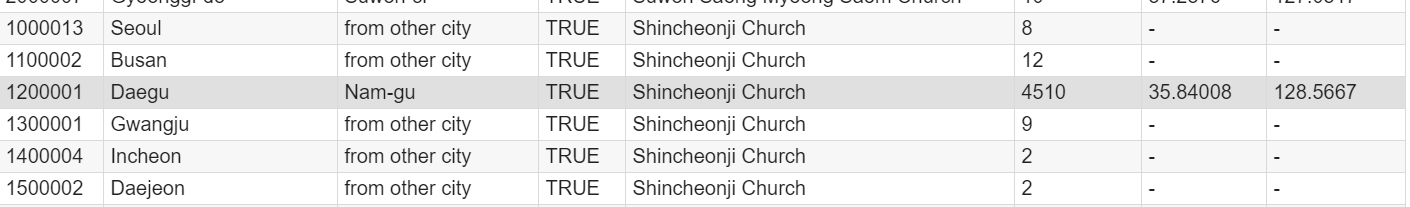

In [6]:
# 'confirmed'의 최댓값을 구하면 가장 최근 날짜의 confirmed를 확인 가능
# 따라서 comfirmed와 infection_case로 이루어진 데이터프레임 새로 만들기

df_location = pd.DataFrame(case.groupby(['infection_case'])['confirmed'].max())

# if, index를 기준으로 정렬하고 싶으면? => sort_index(asceding = )
# 'ascending = False' == 내림차순 정렬!
df_location = df_location.sort_values(by=['confirmed'], ascending=False).reset_index()
df_location.head()

,infection_case,confirmed
0,Shincheonji Church,4510.0
1,contact with patient,920.0
2,etc,737.0
3,overseas inflow,346.0
4,Second Mi-Ju Hospital,196.0


#### seaborn을 이용해 (확진자 수, 감염 장소) 그래프 그리기

In [7]:
import seaborn as sns

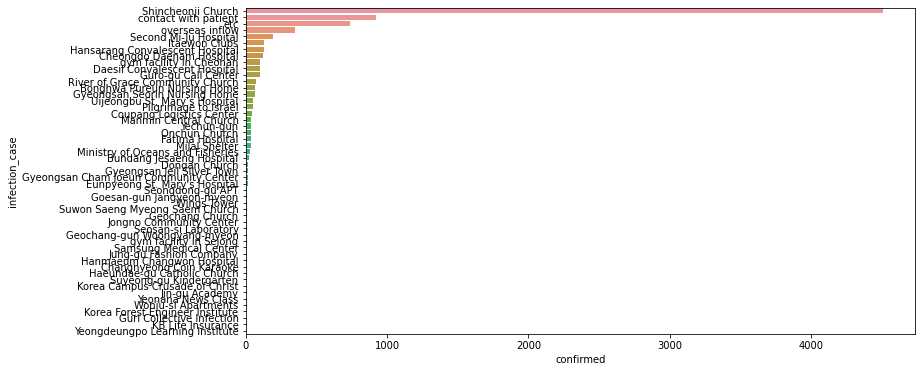

In [19]:
plt.figure(figsize=[12,6])
sns.barplot(df_location.confirmed, y=df_location.infection_case) 
plt.show()

### 'policy' 데이터 확인 및 전처리

In [9]:
# 사회적 거리두기 정책 관련 index 확인
policy[27:32]

,policy_id,country,type,gov_policy,detail,start_date,end_date
27,28,Korea,Health,Mask Distribution,5-day Rotation System,2020-03-09,NaN
28,29,Korea,Social,Social Distancing Campaign,Strong,2020-03-22,2020-04-05
29,30,Korea,Social,Social Distancing Campaign,Strong,2020-04-06,2020-04-19
30,31,Korea,Social,Social Distancing Campaign,Weak,2020-04-20,2020-05-05
31,32,Korea,Social,Thanks to Challenge korea,Relay Cheer Campaign in SNS,2020-04-16,NaN


#### 데이터 확인해보면 이걸 찾는 코드!
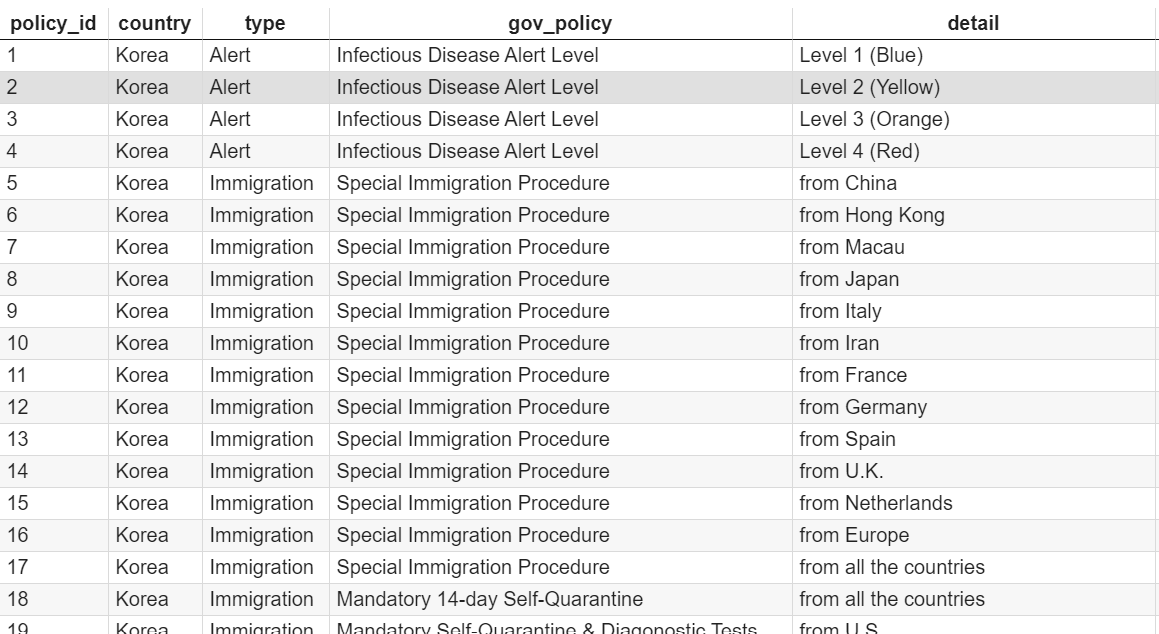

In [10]:
# policy 데이터프레임 데이터 정보 확인
policy.info()
# gov_policy 확인
print(policy['gov_policy'].value_counts())
print(policy['detail'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   policy_id   58 non-null     int64 
 1   country     58 non-null     object
 2   type        58 non-null     object
 3   gov_policy  58 non-null     object
 4   detail      56 non-null     object
 5   start_date  58 non-null     object
 6   end_date    23 non-null     object
dtypes: int64(1), object(6)
memory usage: 3.3+ KB
Special Immigration Procedure                    13
School Opening with Online Class                 10
Emergency Use Authorization of Diagnostic Kit     5
Infectious Disease Alert Level                    4
School Opening Delay                              4
Social Distancing Campaign                        3
Drive-Through Screening Center                    2
Wearing of masks                                  2
Mask Distribution                                 2
Self-Quarantine Safe

#### '사회적 거리두기 단계'로 데이터프레임 만들기

In [11]:
# gov_policy > Social Distancing Campaign으로 이루어진 데이터프레임 새로 만들기

df_alertlevel = policy[policy['gov_policy']=='Social Distancing Campaign']
df_alertlevel

,policy_id,country,type,gov_policy,detail,start_date,end_date
28,29,Korea,Social,Social Distancing Campaign,Strong,2020-03-22,2020-04-05
29,30,Korea,Social,Social Distancing Campaign,Strong,2020-04-06,2020-04-19
30,31,Korea,Social,Social Distancing Campaign,Weak,2020-04-20,2020-05-05


### 'time' 데이터 확인 및 전처리

In [29]:
# 본래 'time'데이터는 건들지 않기 위해 'time_edit'을 생성
# shallow copy를 하기 위해 .copy() 사용
time_edit = time.copy()
time_edit
time_edit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       133 non-null    object
 1   time       133 non-null    int64 
 2   test       133 non-null    int64 
 3   negative   133 non-null    int64 
 4   confirmed  133 non-null    int64 
 5   released   133 non-null    int64 
 6   deceased   133 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 7.4+ KB


In [13]:
time_edit[61:77]

,date,time,test,negative,confirmed,released,deceased
61,2020-03-21,0,327509,303006,8799,2612,102
62,2020-03-22,0,331780,308343,8897,2909,104
63,2020-03-23,0,338036,315447,8961,3166,111
64,2020-03-24,0,348582,324105,9037,3507,120
65,2020-03-25,0,357896,334481,9137,3730,126
66,2020-03-26,0,364942,341332,9241,4144,131
67,2020-03-27,0,376961,352410,9332,4528,139
68,2020-03-28,0,387925,361883,9478,4811,144
69,2020-03-29,0,394141,369530,9583,5033,152
70,2020-03-30,0,395194,372002,9661,5228,158


### '사회적 거리두기' 단계 시행 후 코로나 감염자 수 등 변화 추이

#### 일별로 test, negative, confirmed, released, deceased 수 DataFrame 만들기

In [14]:
# $여기 코드는 한 번만 돌릴 것! (안 그러면 계속 계산이 돼서 마이너스 값 나옴)$
"""
SDC 1st : 2020-03-22 ~ 2020-04-05
SDC 2nd : 2020-04-06 ~ 2020-04-19
SDC 3rd : 2020-04-20 ~ 2020-05-05
"""
"""
1) 사회적 거리두기 시행한 기간 동안(전체 기간)의 자료 추출
2) '1)' DataFrame을 '일 별 데이터(not 누적)'로 변경
3) 위에서 만든 DataFrame 세 파트로 나누기
"""

df_sdc = time_edit[61:108]
df_sdc = pd.DataFrame(df_sdc)
# df_sdc

# reset_index해서 index 초기화(0부터 시작하게끔) 시켜줌
# 이전 index 삭제하려면 (drop=True), 원본 객체 변경하려면 (inplace=True)
df_sdc.reset_index(drop=True, inplace=True)
df_sdc

for i in range(45,0,-1): #row
    for ii in range(2,7): #column
        df_sdc.iloc[i,ii] = df_sdc.iloc[i, ii] - df_sdc.iloc[i-1, ii]
df_sdc

# (9/3) Q. 좀 더 깔끔하게 for문 짤 수 있는 방법은?
# for i in range(len(df_sdc_1st)):
#     df_sdc_1st['test'][137-i] = df_sdc_1st['test'][137-i] - df_sdc_1st['test'][137-(i+1)]
#     df_sdc_1st['negative'][137-i] = df_sdc_1st['negative'][137-i] - df_sdc_1st['negative'][137-(i+1)]
#     df_sdc_1st['confirmed'][137-i] = df_sdc_1st['confirmed'][137-i] - df_sdc_1st['confirmed'][137-(i+1)]
#     df_sdc_1st['released'][137-i] = df_sdc_1st['released'][137-i] - df_sdc_1st['released'][137-(i+1)]
#     df_sdc_1st['deceased'][137-i] = df_sdc_1st['deceased'][137-i] - df_sdc_1st['deceased'][137-(i+1)]
# df_sdc_1st

,date,time,test,negative,confirmed,released,deceased
0,2020-03-21,0,327509,303006,8799,2612,102
1,2020-03-22,0,4271,5337,98,297,2
2,2020-03-23,0,6256,7104,64,257,7
3,2020-03-24,0,10546,8658,76,341,9
4,2020-03-25,0,9314,10376,100,223,6
5,2020-03-26,0,7046,6851,104,414,5
6,2020-03-27,0,12019,11078,91,384,8
7,2020-03-28,0,10964,9473,146,283,5
8,2020-03-29,0,6216,7647,105,222,8
9,2020-03-30,0,1053,2472,78,195,6


In [15]:
# 3) 위에서 만든 DataFrame 세 파트로 나누기
df_sdc_1st = df_sdc.iloc[1:16, :]
df_sdc_1st

df_sdc_2nd = df_sdc.iloc[16:30, :]
df_sdc_2nd

df_sdc_3rd = df_sdc.iloc[30:46, :]
df_sdc_3rd

,date,time,test,negative,confirmed,released,deceased
30,2020-04-20,0,3926,4175,13,72,2
31,2020-04-21,0,7979,7230,9,99,1
32,2020-04-22,0,6945,7534,11,64,1
33,2020-04-23,0,6012,7986,8,134,2
34,2020-04-24,0,5549,6082,6,90,0
35,2020-04-25,0,5641,5972,10,134,0
36,2020-04-26,0,3124,3374,10,82,2
37,2020-04-27,0,3375,3469,10,47,1
38,2020-04-28,0,6854,6532,14,90,1
39,2020-04-29,0,5683,6570,9,68,2


#### '사회적 거리두기' 시행 기간 동안의 그래프를 그리기 위한 전처리 작업

In [21]:
# 앞서 만든 df_sdc DataFrame을 '사회적 거리두기' 시행 기간 동안만으로 슬라이싱하기
# 누적 데이터를 가지고 있는 '2020-03-21'행과 '2020-05-06'행을 자름
df_sdc = df_sdc.iloc[1:46, :]
df_sdc

,date,time,test,negative,confirmed,released,deceased
1,2020-03-22,0,4271,5337,98,297,2
2,2020-03-23,0,6256,7104,64,257,7
3,2020-03-24,0,10546,8658,76,341,9
4,2020-03-25,0,9314,10376,100,223,6
5,2020-03-26,0,7046,6851,104,414,5
6,2020-03-27,0,12019,11078,91,384,8
7,2020-03-28,0,10964,9473,146,283,5
8,2020-03-29,0,6216,7647,105,222,8
9,2020-03-30,0,1053,2472,78,195,6
10,2020-03-31,0,15370,11884,125,180,4


#### SDC(사회적 거리두기) 전체 시행 기간 그래프 그리기

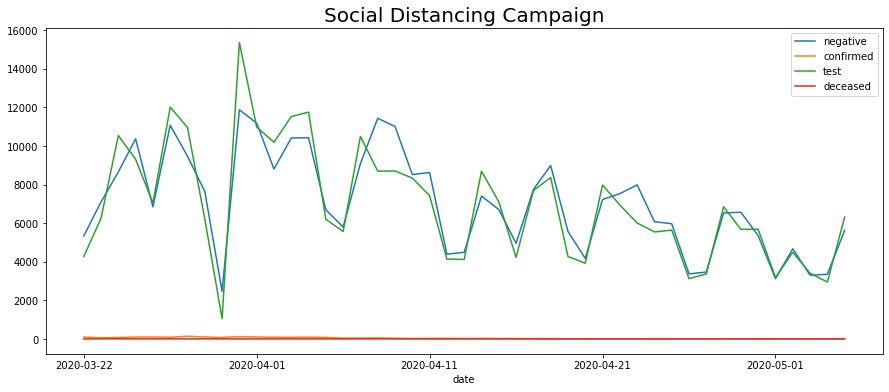

In [68]:
df_sdc[['date', 'negative', 'confirmed', 'test', 'deceased']].plot(x = 'date', figsize = (15, 6), fontsize = 10, )
plt.title('Social Distancing Campaign', fontsize = 20)
plt.show()
# ##data scaling 해보기.! 한 그래프에 어떻게 잘 표현할 수 있을지?!

#### 일별 test, negative, confirmed, released, deceased line 그래프 그리기

Text(0.5, 1.0, 'Social Distancing Campaign 3rd')

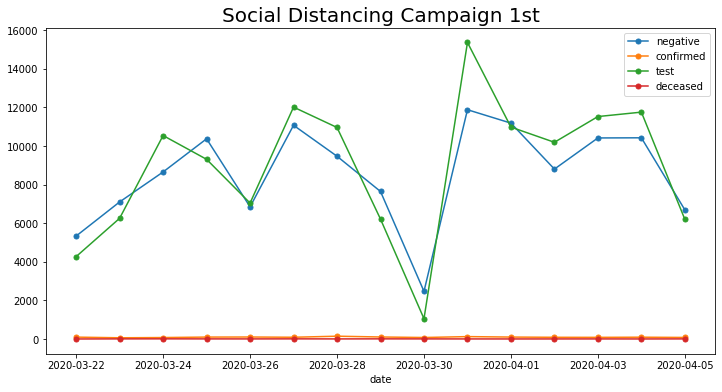

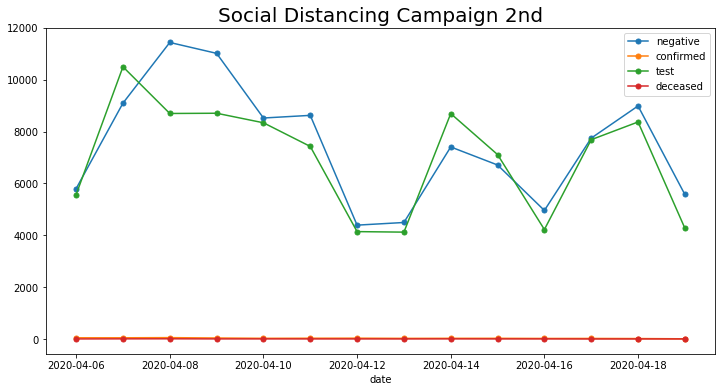

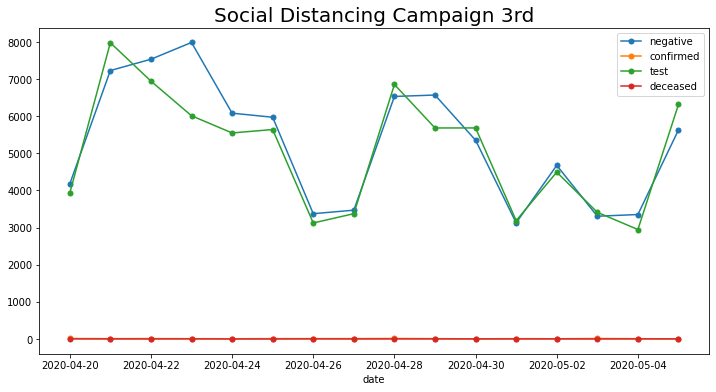

In [49]:
df_sdc_1st[['date','negative','confirmed','test','deceased']].plot(x = 'date', figsize = (12,6), marker='o', ms=5)
plt.title('Social Distancing Campaign 1st', fontsize = 20)

df_sdc_2nd[['date','negative','confirmed','test','deceased']].plot(x = 'date',figsize = (12,6), marker='o', ms=5)
plt.title('Social Distancing Campaign 2nd', fontsize = 20)

df_sdc_3rd[['date','negative','confirmed','test','deceased']].plot(x = 'date',figsize = (12,6), marker='o', ms=5)
plt.title('Social Distancing Campaign 3rd', fontsize = 20)

####  '사회적 거리두기' 시행 이후 누적 데이터 그래프로 그리기

Text(0.5, 1.0, 'Current Situation')

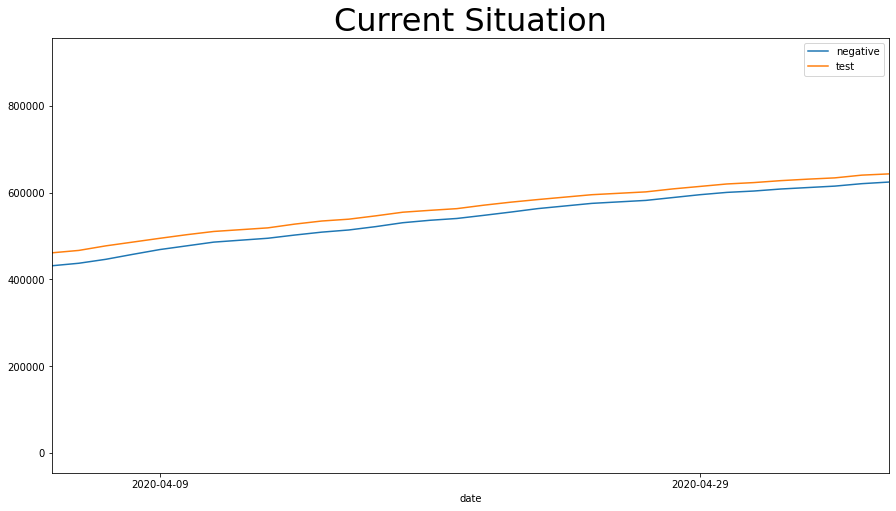

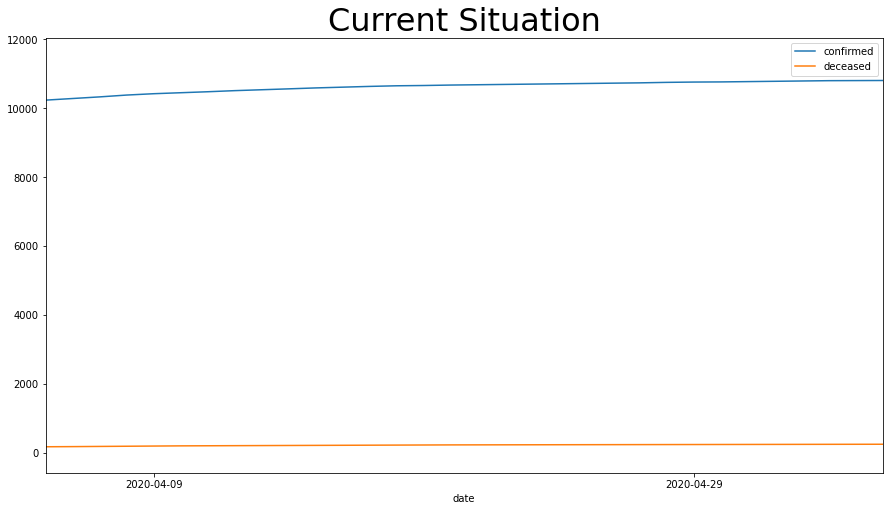

In [17]:
# Q. 좀 더 직관적으로 잘 볼 수 있게 그래프는 어떻게 만들까?
time[['date','negative', 'test']].plot(x = 'date',figsize = (15,8), fontsize = 10)
plt.xlim(76, 107)
plt.title('Current Situation', fontsize = 32)
time[['date','confirmed','deceased']].plot(x = 'date',figsize = (15,8), fontsize = 10)
plt.xlim(76, 107)
plt.title('Current Situation', fontsize = 32)

# ##data scaling 해보기.! 한 그래프에 어떻게 잘 표현할 수 있을지?!

In [18]:
# 해야 할 일
# Blue, Yellow, Orange, Red 별로 

#### To Do : 재난경보 단계에 따른 유동인구 변화

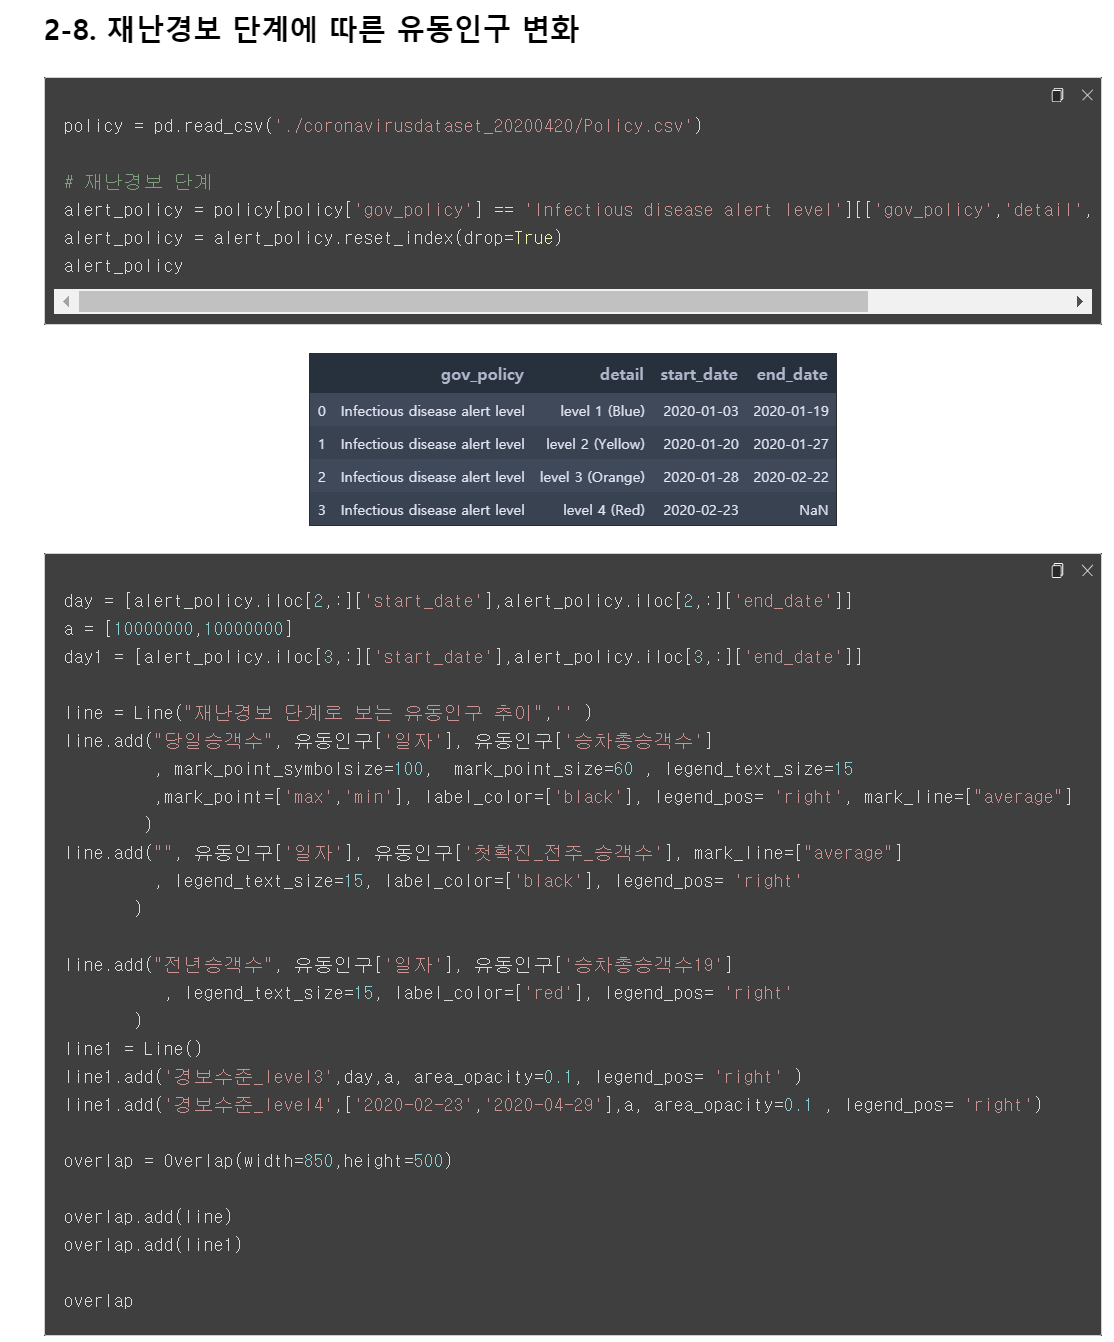

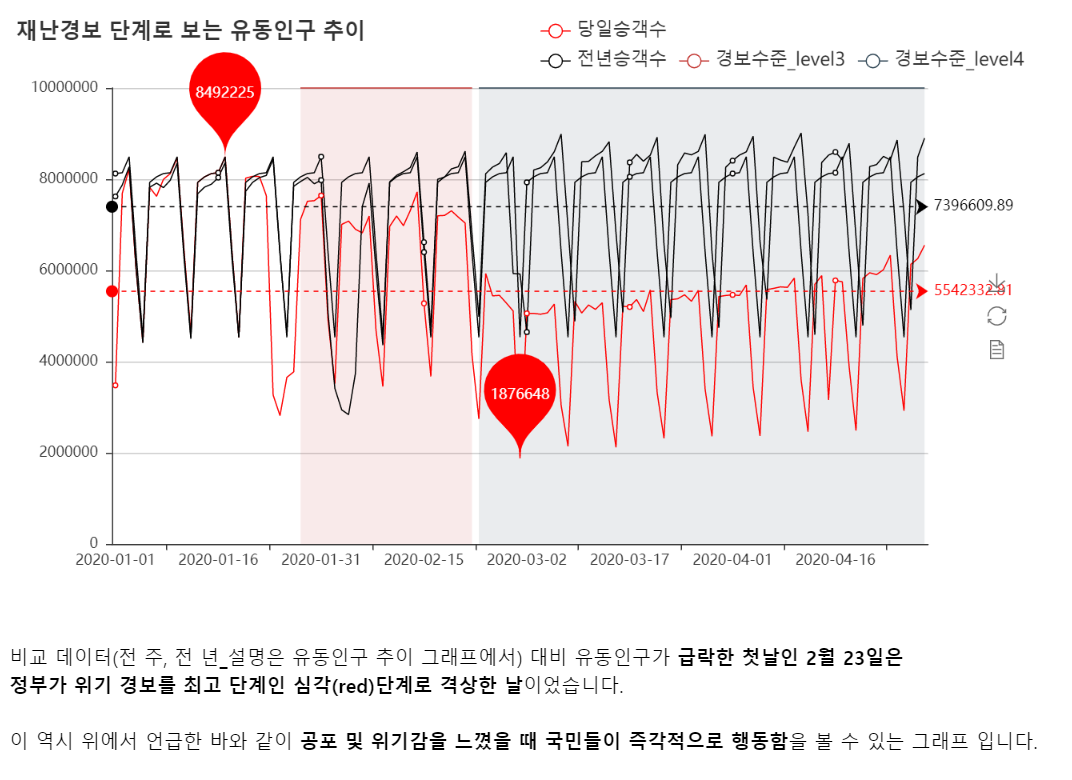